<a href="https://colab.research.google.com/github/davione112/Collection_Preprocessing/blob/master/BikeSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**




In [1]:
import pandas as pd
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn import tree

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Dataset**

In [2]:
url1 = 'https://raw.githubusercontent.com/davione112/work/master/train.csv'
url2 = 'https://raw.githubusercontent.com/davione112/work/master/test.csv'
train = pd.read_csv(url1)
test = pd.read_csv(url2)

- Brief summaries:


In [3]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [6]:
#@title Check for missing data
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [8]:
#@title Combine train and test into a dataset.
dataset = train.append(test)
dataset.reset_index(inplace=True)
dataset.drop('index',inplace=True,axis=1)
dataset = dataset.fillna(0)


In [9]:
dataset.tail(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,0.0,0.0,0.0
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,0.0,0.0,0.0
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,0.0,0.0,0.0
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,0.0,0.0,0.0
17378,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,0.0,0.0,0.0


# Understand variables


In [10]:
dataset.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual        float64
registered    float64
count         float64
dtype: object

## Distributions of continuous variables

Text(0.5, 1.0, 'Windspeed')

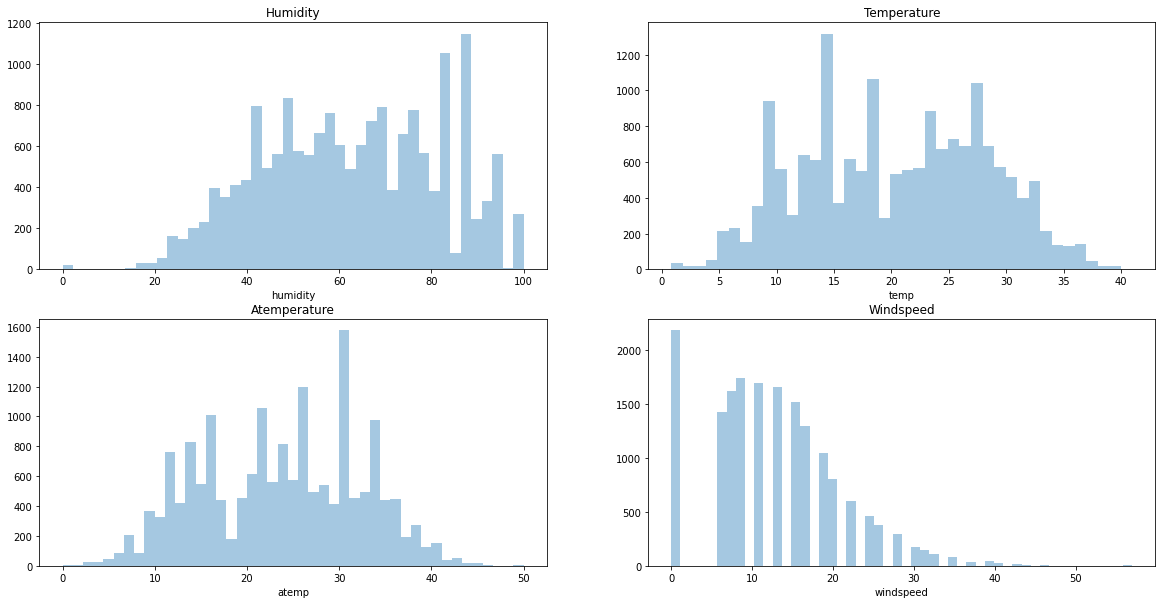

In [11]:

fig, ax = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)
sb.distplot(dataset["humidity"],kde=False,ax=ax[0,0])
sb.distplot(dataset["temp"],kde=False,ax=ax[0,1])
sb.distplot(dataset["atemp"],kde=False,ax=ax[1,0])
sb.distplot(dataset["windspeed"],kde=False,ax=ax[1,1])

ax[0,0].set_title("Humidity")
ax[0,1].set_title("Temperature")
ax[1,0].set_title("Atemperature")
ax[1,1].set_title("Windspeed")

- There are so many values = 0 in windspeed.
- Replace those values by median of column "windspeed".

12.736539622533591


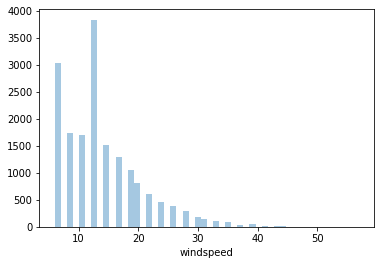

In [12]:
x = dataset['windspeed'].mean()
print(x)
dataset['windspeed'] = dataset['windspeed'].replace(0,x)
sb.distplot(dataset["windspeed"],kde=False)

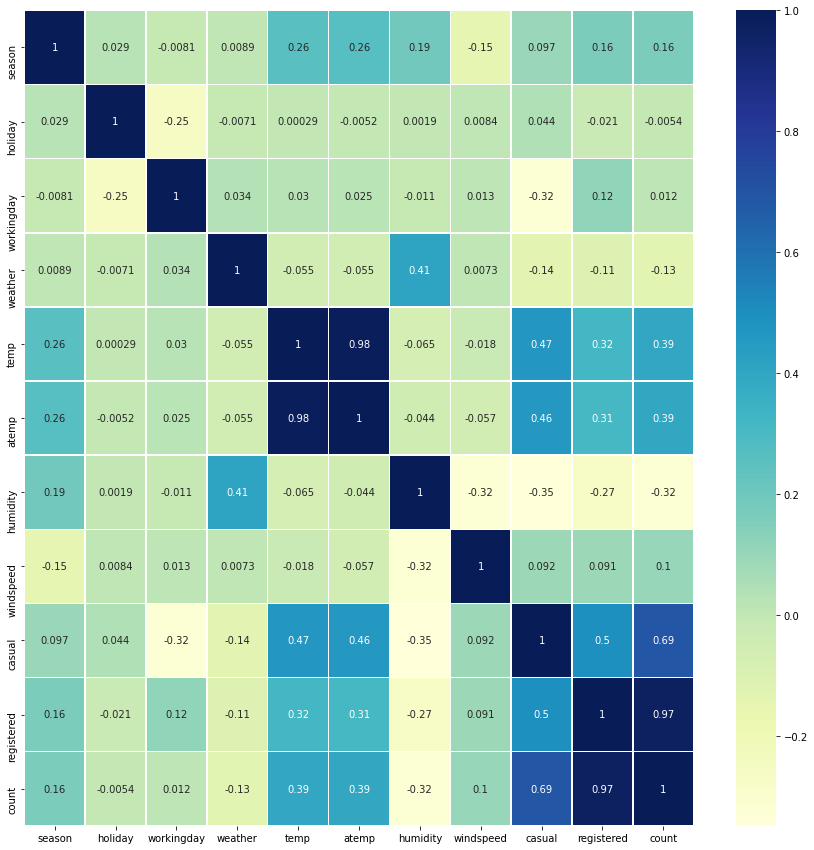

In [13]:
x = train.corr()
plt.figure(figsize=(15,15))
sb.heatmap(x, cmap='YlGnBu', annot=True, annot_kws={"size":10}, linewidths=0.5)

## Distributions of categorical variables


Text(0.5, 1.0, 'Workingday')

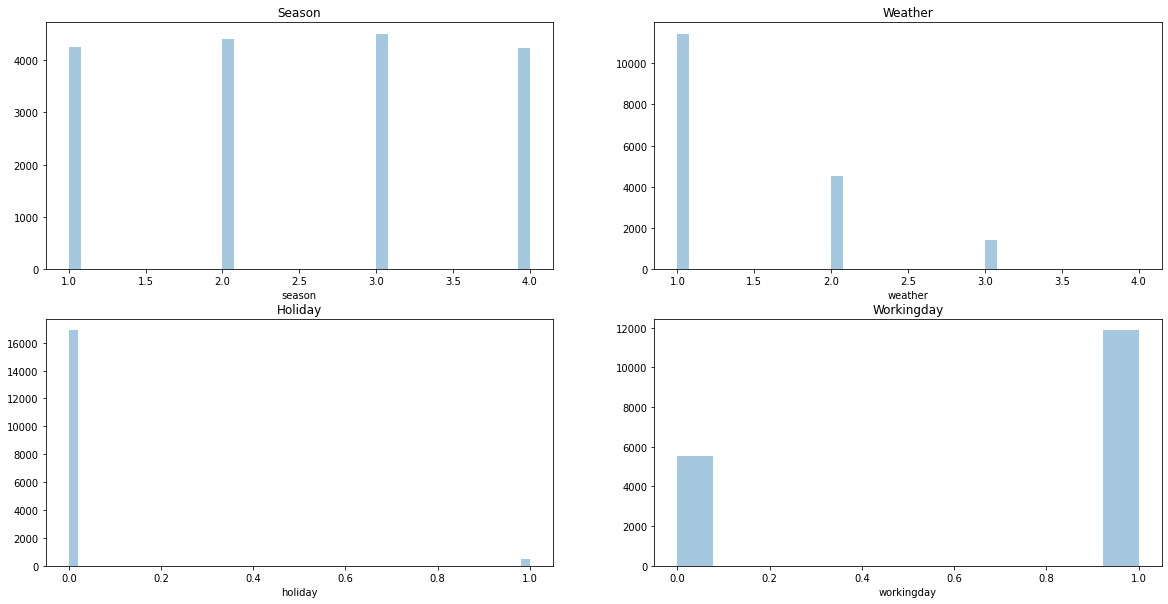

In [14]:
fig, ax = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)
sb.distplot(dataset["season"],kde=False,ax=ax[0,0])
sb.distplot(dataset["weather"],kde=False,ax=ax[0,1])
sb.distplot(dataset["holiday"],kde=False,ax=ax[1,0])
sb.distplot(dataset["workingday"],kde=False,ax=ax[1,1])

ax[0,0].set_title("Season")
ax[0,1].set_title("Weather")
ax[1,0].set_title("Holiday")
ax[1,1].set_title("Workingday")

## Distribution of Count per each hours

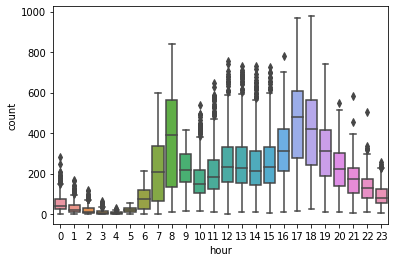

In [ ]:
# boxplot bike rentals per hour in train set.
plt.figure(figsize=(15,8))
sb.boxplot(x='hour',y='count',data=train)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


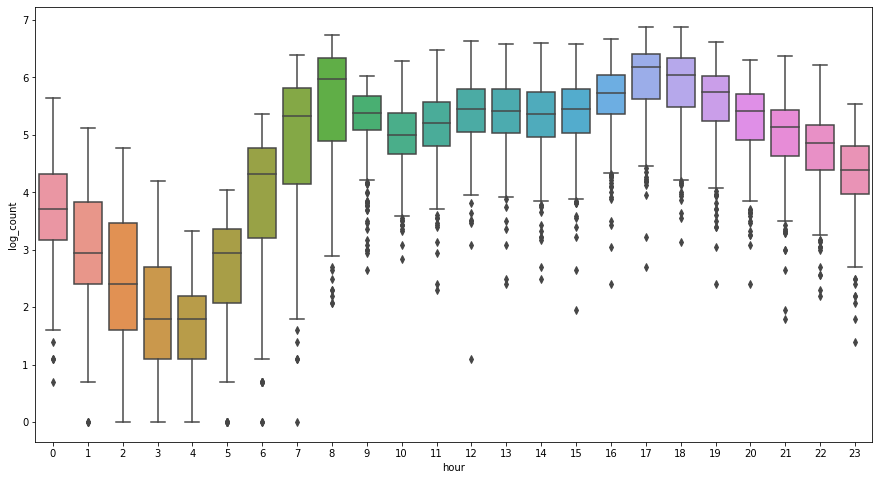

In [52]:
# Natural logarit with count and split into train and test.
dataset['log_count'] = np.log(dataset['count'])
train = dataset[pd.to_numeric(dataset['date']) < 20]
test = dataset[pd.to_numeric(dataset['date']) >=20]

# Boxplot for 'log_count'
plt.figure(figsize=(15,8))
sb.boxplot(x='hour',y='log_count',data=train)

## Hour trending

In [15]:
# convert 'datetime' column to datetime datatype
dataset['datetime'] = pd.to_datetime(dataset['datetime'],
                                     format='%Y-%m-%d %H:%M:%S')

In [16]:
# add 'hour' and 'date' columns to dataset
hours = []
for i in range(len(dataset['datetime'])):
  hours.append(dataset['datetime'][i].hour)
dataset["hour"] = hours
dates = []
for i in range(len(dataset['datetime'])):
  dates.append(dataset['datetime'][i].day)
dataset["date"] = dates

In [17]:
# divide dataset into train and test
dataset[['season','holiday','weather','workingday']] = dataset[['season','holiday','weather','workingday']].astype('category')
dataset.head(5)
train = dataset[pd.to_numeric(dataset['date']) < 20]
test = dataset[pd.to_numeric(dataset['date']) >=20]

Text(0.5, 1.0, 'Registered per hour')

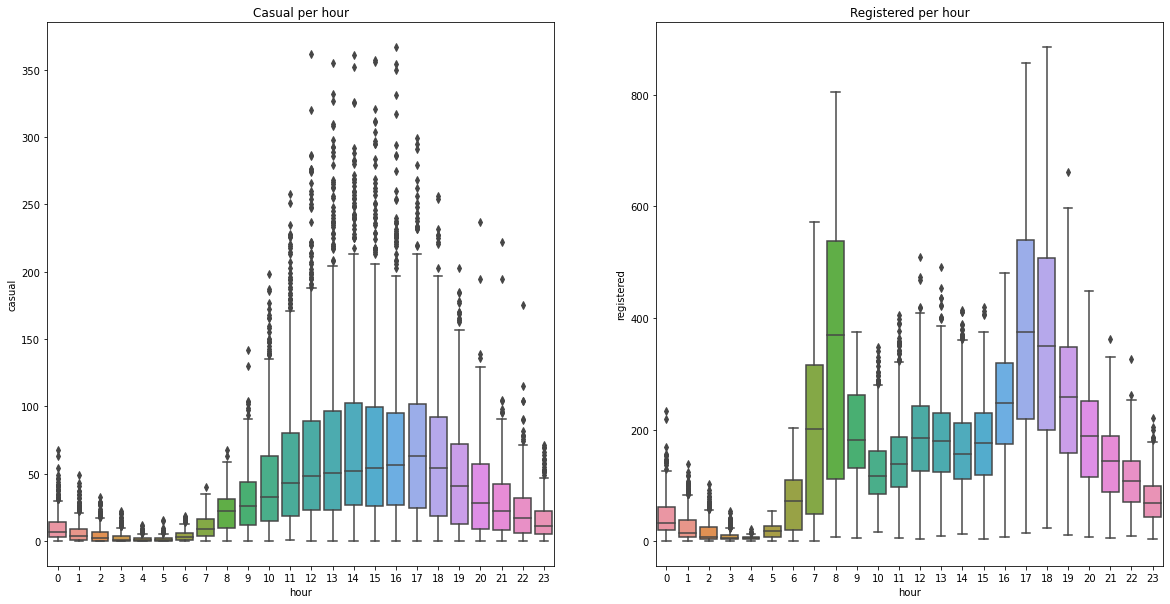

In [19]:
fig, (axis1,axis2) = plt.subplots(1,2)
fig.set_size_inches(20,10)
sb.boxplot(x='hour',y='casual',data=train,ax=axis1)
sb.boxplot(x='hour',y='registered',data=train,ax=axis2)

axis1.set_title('Casual per hour')
axis2.set_title('Registered per hour')

- From those 3 plots, we get some prediction:


1.   High count: 7-9 hour , 16-19 hour.
2.   Average count: 10-15 hour, 20-22 hour.
3.   Low count: 0-6 hour, 23 hour.

=> We can segregate into categories, with code lines below:


In [20]:
dataset['hour'] = dataset['hour'].astype('int64')
#dataset['hour_ctg'] = 0
dataset.loc[(dataset['hour']>=0) & (dataset['hour']<=6),'hour_ctg'] = 1
dataset.loc[(dataset['hour']>=23),'hour_ctg'] = 1
dataset.loc[(dataset['hour']>=7) & (dataset['hour']<=9),'hour_ctg'] = 3
dataset.loc[(dataset['hour']>=16) & (dataset['hour']<=19),'hour_ctg'] = 3
dataset.loc[(dataset['hour']>=10) & (dataset['hour']<=15),'hour_ctg'] = 2
dataset.loc[(dataset['hour']>=20) & (dataset['hour']<=22),'hour_ctg'] = 2

In [21]:
# divide dataset into train and test
train = dataset[pd.to_numeric(dataset['date']) < 20]
test = dataset[pd.to_numeric(dataset['date']) >=20]

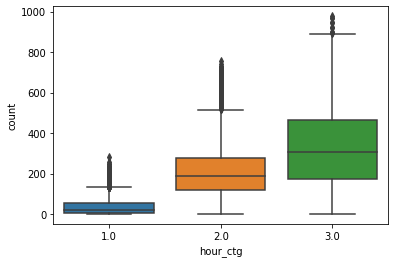

In [22]:
sb.boxplot(x='hour_ctg',y='count',data=train)

## Daily trend

In [23]:
# extracting days of week from datetime
days = []
for i in range(len(dataset['datetime'])):
  days.append(dataset['datetime'][i].weekday())
dataset['day'] = days

In [24]:
dataset.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual               float64
registered           float64
count                float64
hour                   int64
date                   int64
hour_ctg             float64
day                    int64
dtype: object

In [25]:
# divide again dataset into train and test
train = dataset[pd.to_numeric(dataset['date']) < 20]
test = dataset[pd.to_numeric(dataset['date'])>=20]

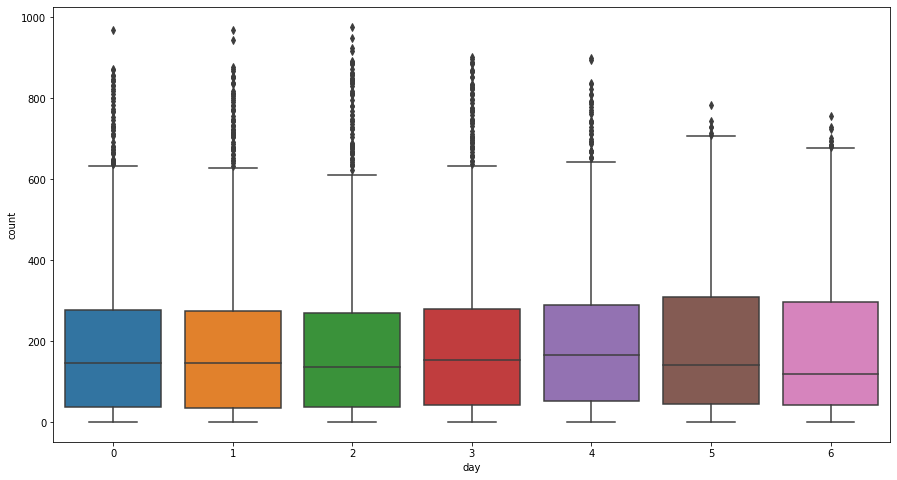

In [26]:
# Boxplot shows users’ demand over days.
plt.figure(figsize=(15,8))
sb.boxplot(x='day',y='count',data=train)

- In this plot: 0-Monday, 1-Tuesday, 2-Wednesday, 3-Thursday, 4-Friday, 5-Saturday, 6-Sunday.

Text(0.5, 1.0, 'Count per workingday')

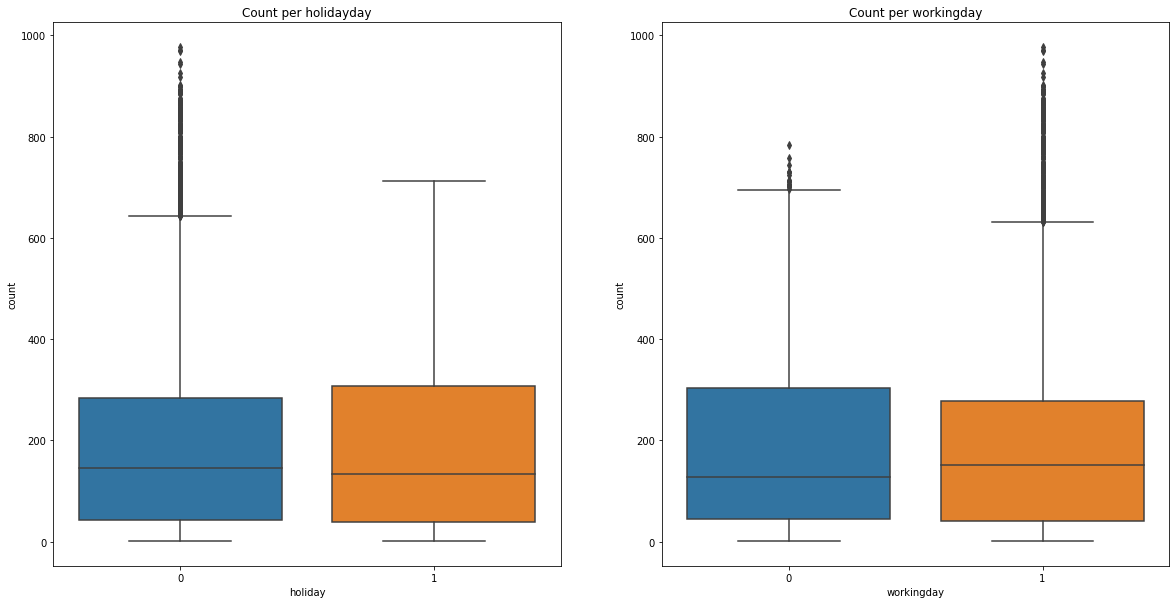

In [27]:
# Boxplot shows users’ demand over holidays.
fig, (axis1,axis2) = plt.subplots(1,2)
fig.set_size_inches(20,10)
sb.boxplot(x='holiday',y='count',data=train, ax=axis1)
sb.boxplot(x='workingday',y='count',data=train,ax=axis2)

axis1.set_title('Count per holidayday')
axis2.set_title('Count per workingday')

- 'holiday' boxplot and 'workingday' boxplot are similar.

## Weather trending

Text(0.5, 1.0, 'Registered per weather')

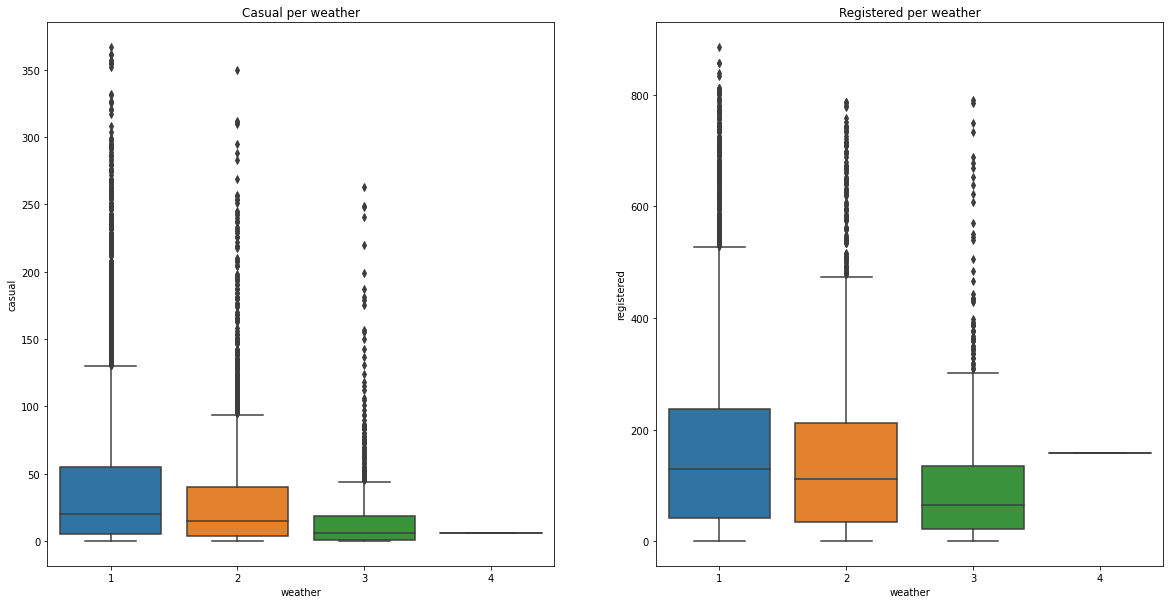

In [28]:
# Boxplot shows registered and casual users’ demand each weather.
fig, (axis1,axis2) = plt.subplots(1,2)
fig.set_size_inches(20,10)
sb.boxplot(x='weather',y='casual',data=train,ax=axis1)
sb.boxplot(x='weather',y='registered',data=train,ax=axis2)

axis1.set_title('Casual per weather')
axis2.set_title('Registered per weather')

## Comparision of bike rentals between 2011 and 2012

In [29]:
# Extract 'year' from datetime.
years = []
for i in range(len(dataset['datetime'])):
  years.append(dataset['datetime'][i].year)
dataset['year'] = years

In [30]:
# divide again dataset into train and test
train = dataset[pd.to_numeric(dataset['date']) < 20]
test = dataset[pd.to_numeric(dataset['date'])>=20]

Text(0.5, 1.0, 'bike rentals between 2011 and 2012')

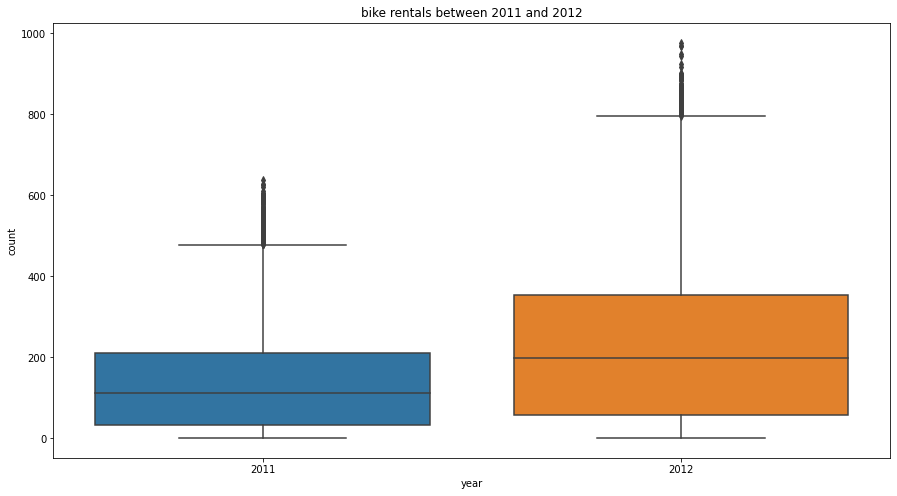

In [31]:
# Boxplot of bike rentals between '2011' and '2012'
plt.figure(figsize=(15,8))
sb.boxplot(x='year',y='count',data=train)
plt.title('bike rentals between 2011 and 2012')

##Season trending

In [32]:
# Combine 'year' and 'season'
dataset['year_season']= dataset['year'] + pd.to_numeric(dataset['season'])/10

In [33]:
# divide again dataset into train and test
train = dataset[pd.to_numeric(dataset['date']) < 20]
test = dataset[pd.to_numeric(dataset['date'])>=20]

Text(0.5, 1.0, 'bike rentals between each seasons in 2011 and 2012')

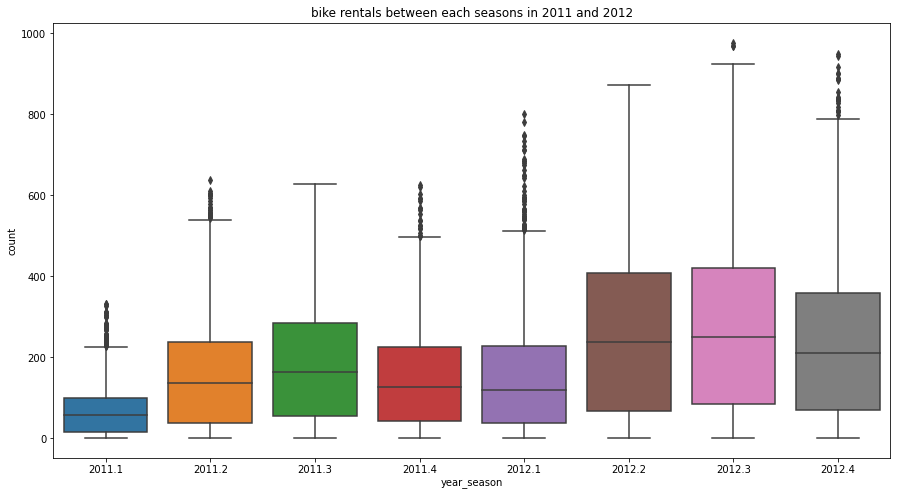

In [34]:
plt.figure(figsize=(15,8))
sb.boxplot(x='year_season',y='count',data=train)
plt.title('bike rentals between each seasons in 2011 and 2012')

- Amount of bike rentals in season 1,4 of 2011 and season 1 of 2012 is lower than the others season and there a lot outliers.
- We feature this 'year_season' using Median of each season.

In [41]:
# store median count each year seasons in x, join dataset with respect to 'year_season'.
x = dataset.groupby('year_season')[['count']].median()
x.columns = ['count_season']
dataset = dataset.join(x,on='year_season')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date,hour_ctg,day,year,year_season,count_season
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,12.73654,3.0,13.0,16.0,0,1,1.0,5,2011,2011.1,12.5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,12.73654,8.0,32.0,40.0,1,1,1.0,5,2011,2011.1,12.5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,12.73654,5.0,27.0,32.0,2,1,1.0,5,2011,2011.1,12.5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,12.73654,3.0,10.0,13.0,3,1,1.0,5,2011,2011.1,12.5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,12.73654,0.0,1.0,1.0,4,1,1.0,5,2011,2011.1,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.00140,0.0,0.0,0.0,19,31,3.0,0,2012,2012.1,23.0
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.00140,0.0,0.0,0.0,20,31,2.0,0,2012,2012.1,23.0
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.00140,0.0,0.0,0.0,21,31,2.0,0,2012,2012.1,23.0
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.99810,0.0,0.0,0.0,22,31,2.0,0,2012,2012.1,23.0


## Change datatype.

In [ ]:
# Convert to 'category'.
list_var = ['hour_ctg','day','year','year_season','count_season']
for var in list_var:
  dataset[var] = dataset[var].astype('category')

In [53]:
# divide again dataset into train and test
train = dataset[pd.to_numeric(dataset['date']) < 20]
test = dataset[pd.to_numeric(dataset['date'])>=20]

# **Modeling**

In [54]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date,hour_ctg,day,year,year_season,log_count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,12.73654,3.0,13.0,16.0,0,1,1.0,5,2011,2011.1,2.772589
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,12.73654,8.0,32.0,40.0,1,1,1.0,5,2011,2011.1,3.688879
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,12.73654,5.0,27.0,32.0,2,1,1.0,5,2011,2011.1,3.465736
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,12.73654,3.0,10.0,13.0,3,1,1.0,5,2011,2011.1,2.564949
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,12.73654,0.0,1.0,1.0,4,1,1.0,5,2011,2011.1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.00270,7.0,329.0,336.0,19,19,3.0,2,2012,2012.4,5.817111
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.00130,10.0,231.0,241.0,20,19,2.0,2,2012,2012.4,5.484797
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.00130,4.0,164.0,168.0,21,19,2.0,2,2012,2012.4,5.123964
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.00320,12.0,117.0,129.0,22,19,2.0,2,2012,2012.4,4.859812


In [55]:
test.reset_index(drop=True)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date,hour_ctg,day,year,year_season,log_count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.00270,0.0,0.0,0.0,0,20,1.0,3,2011,2011.1,-inf
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,12.73654,0.0,0.0,0.0,1,20,1.0,3,2011,2011.1,-inf
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,12.73654,0.0,0.0,0.0,2,20,1.0,3,2011,2011.1,-inf
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.00140,0.0,0.0,0.0,3,20,1.0,3,2011,2011.1,-inf
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.00140,0.0,0.0,0.0,4,20,1.0,3,2011,2011.1,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.00140,0.0,0.0,0.0,19,31,3.0,0,2012,2012.1,-inf
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.00140,0.0,0.0,0.0,20,31,2.0,0,2012,2012.1,-inf
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.00140,0.0,0.0,0.0,21,31,2.0,0,2012,2012.1,-inf
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.99810,0.0,0.0,0.0,22,31,2.0,0,2012,2012.1,-inf


In [56]:
train.dtypes

datetime       datetime64[ns]
season               category
holiday              category
workingday           category
weather              category
temp                  float64
atemp                 float64
humidity                int64
windspeed             float64
casual                float64
registered            float64
count                 float64
hour                    int64
date                    int64
hour_ctg              float64
day                     int64
year                    int64
year_season           float64
log_count             float64
dtype: object